In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Carregar o ficheiro CSV
df = pd.read_csv("C:/Users/LENOVO/AIRPOL_data.csv", delimiter=';', decimal=',')

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print("Dimensão do dataset:", df.shape)

display(df.head(5))

display(df.describe(include='all'))

Dimensão do dataset: (49140, 8)


,Country,NUTS_Code,Air_Pollutant,Outcome,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value
0,Albania,AL,NO2,Asthma,2337443.0,11299.0,5.5,103.0
1,Albania,AL,PM2.5,Asthma,456076.0,11299.0,11.3,231.0
2,Albania,AL0,NO2,Asthma,2337443.0,11299.0,5.5,103.0
3,Albania,AL0,PM2.5,Asthma,456076.0,11299.0,11.3,231.0
4,Albania,AL03,PM2.5,Asthma,149508.0,4041.5,11.3,69.0


,Country,NUTS_Code,Air_Pollutant,Outcome,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value
count,49140,49140,49140,49140,4.914000e+04,4.914000e+04,49140.000000,49140.000000
unique,42,1755,3,6,NaN,NaN,NaN,NaN
top,Germany,BA,PM2.5,Asthma,NaN,NaN,NaN,NaN
freq,13224,116,29682,10254,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.023692e+06,6.534426e+03,15.138166,366.798657
std,NaN,NaN,NaN,NaN,9.085726e+06,5.661679e+04,22.579360,5494.481929
min,NaN,NaN,NaN,NaN,2.674000e+03,2.000000e+00,0.100000,0.000000
25%,NaN,NaN,NaN,NaN,1.069040e+05,5.697000e+02,7.200000,3.000000
50%,NaN,NaN,NaN,NaN,2.388280e+05,1.340100e+03,8.900000,23.000000
75%,NaN,NaN,NaN,NaN,5.988800e+05,4.215200e+03,11.400000,112.000000


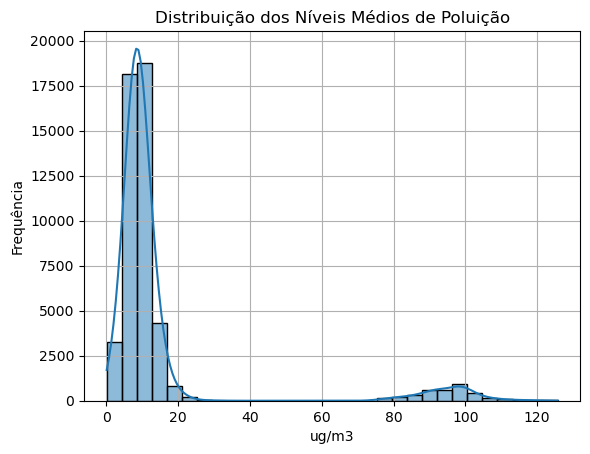

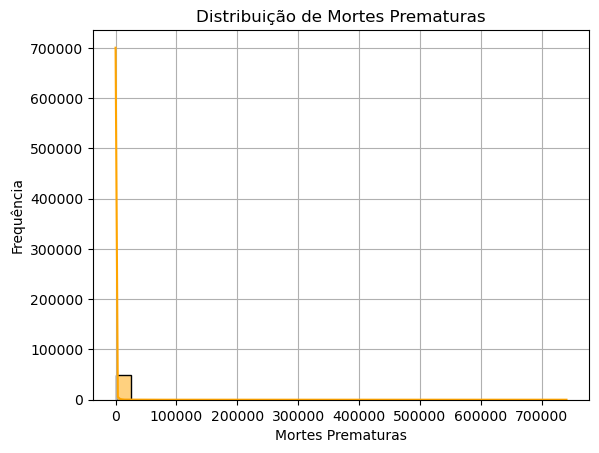

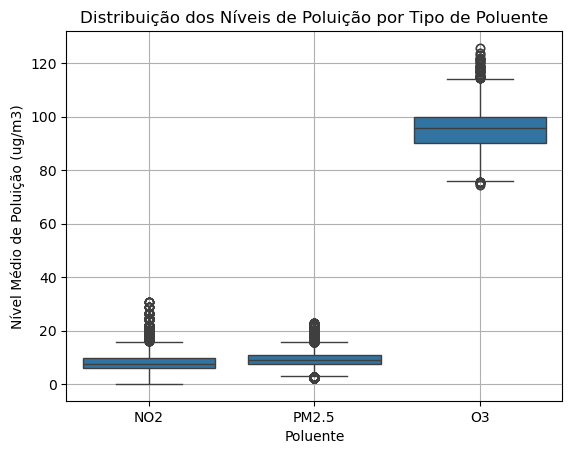

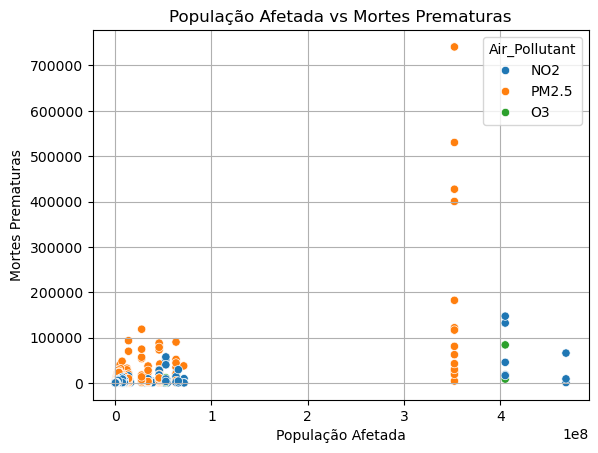

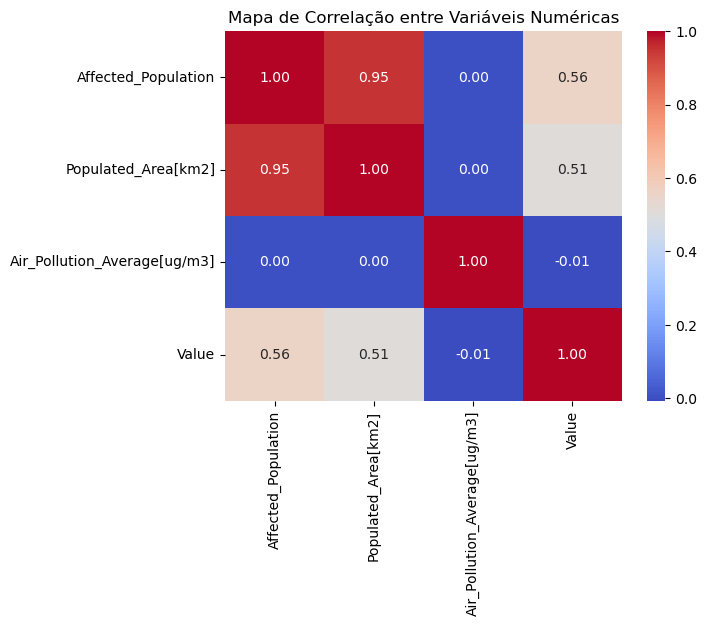

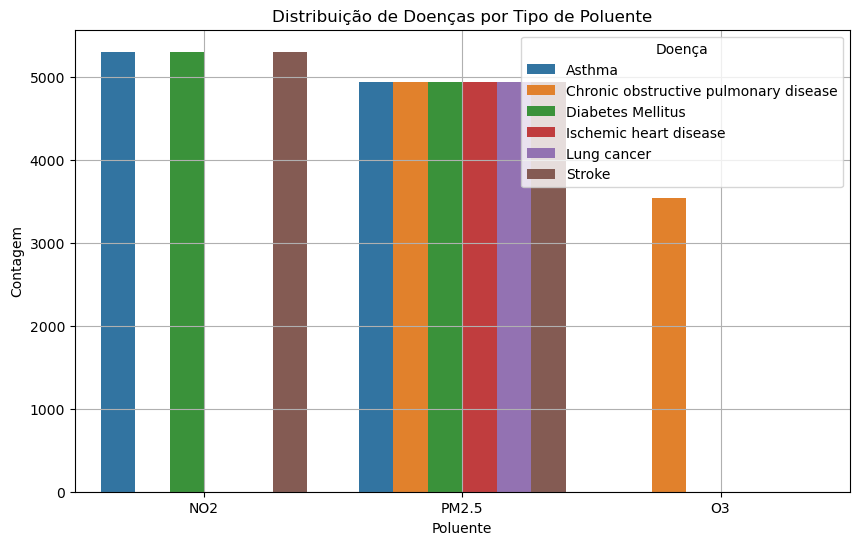

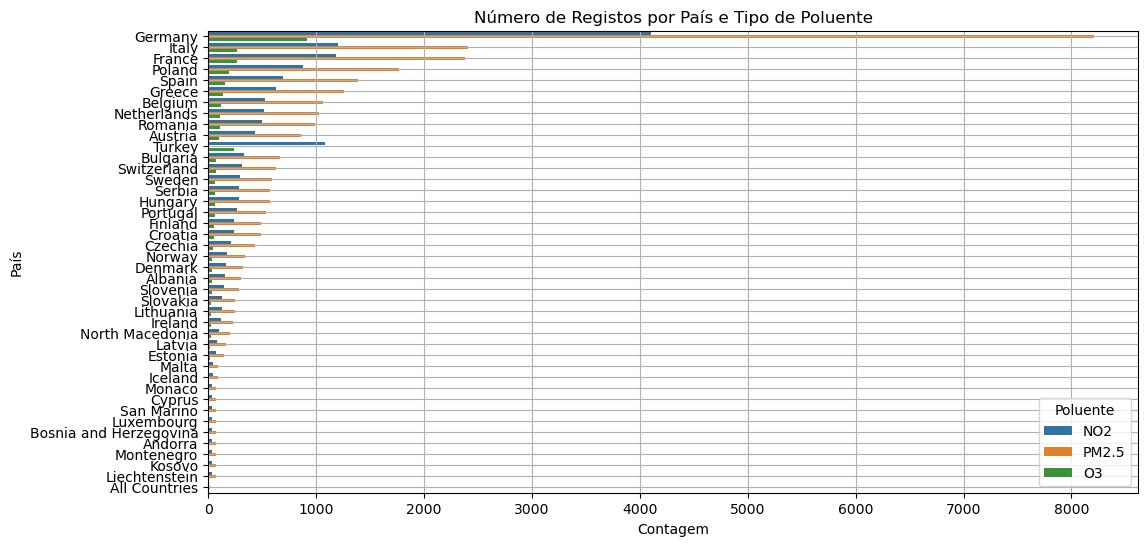

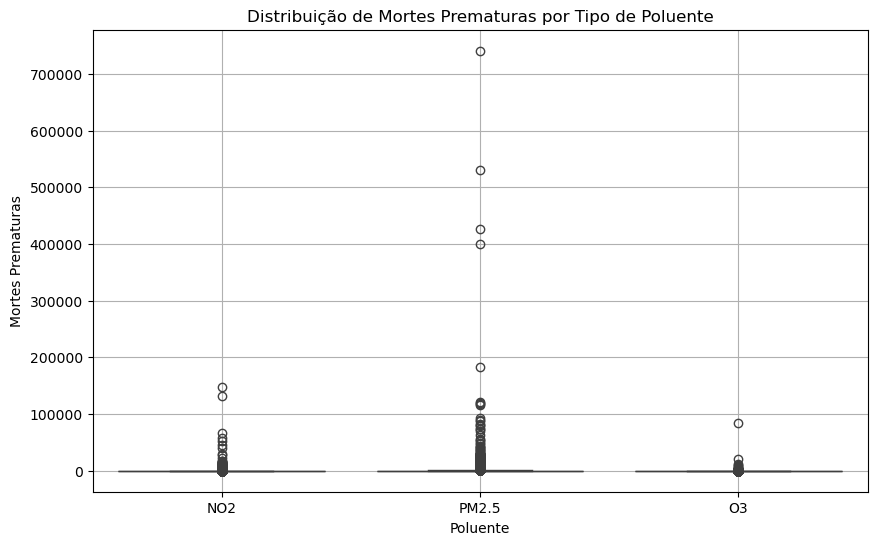

In [12]:
# 1. Histograma dos níveis médios de poluição
sns.histplot(df['Air_Pollution_Average[ug/m3]'], kde=True, bins=30)
plt.title('Distribuição dos Níveis Médios de Poluição')
plt.xlabel('ug/m3')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# 2. Histograma das mortes prematuras
sns.histplot(df['Value'], kde=True, bins=30, color='orange')
plt.title('Distribuição de Mortes Prematuras')
plt.xlabel('Mortes Prematuras')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# 3. Boxplot dos níveis de poluição por tipo de poluente
sns.boxplot(x='Air_Pollutant', y='Air_Pollution_Average[ug/m3]', data=df)
plt.title('Distribuição dos Níveis de Poluição por Tipo de Poluente')
plt.xlabel('Poluente')
plt.ylabel('Nível Médio de Poluição (ug/m3)')
plt.grid(True)
plt.show()

# 4. Gráfico de dispersão entre população afetada e mortes prematuras
sns.scatterplot(x='Affected_Population', y='Value', hue='Air_Pollutant', data=df)
plt.title('População Afetada vs Mortes Prematuras')
plt.xlabel('População Afetada')
plt.ylabel('Mortes Prematuras')
plt.grid(True)
plt.show()

# 5. Mapa de calor com correlação entre variáveis numéricas
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

# 6. Distribuição de doenças por poluente
plt.figure(figsize=(10, 6))
sns.countplot(x='Air_Pollutant', hue='Outcome', data=df)
plt.title('Distribuição de Doenças por Tipo de Poluente')
plt.xlabel('Poluente')
plt.ylabel('Contagem')
plt.legend(title='Doença')
plt.grid(True)
plt.show()

# 7. Número de registos por país e poluente
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', hue='Air_Pollutant', data=df, order=df['Country'].value_counts().index)
plt.title('Número de Registos por País e Tipo de Poluente')
plt.xlabel('Contagem')
plt.ylabel('País')
plt.legend(title='Poluente')
plt.grid(True)
plt.show()

# 8. Distribuição de mortes prematuras por tipo de poluente
plt.figure(figsize=(10, 6))
sns.boxplot(x='Air_Pollutant', y='Value', data=df)
plt.title('Distribuição de Mortes Prematuras por Tipo de Poluente')
plt.xlabel('Poluente')
plt.ylabel('Mortes Prematuras')
plt.grid(True)
plt.show()


In [47]:
import pandas as pd


# Identificar as colunas numéricas relevantes
numericFeatures = ['Affected_Population', 'Populated_Area[km2]',
                   'Air_Pollution_Average[ug/m3]', 'Value']

print(f"Número de linhas antes da remoção de outliers: {len(df)}")

# Criar filtro inicial com todos os valores válidos
filtro_geral = pd.Series(True, index=df.index)

# Aplicar filtro IQR para cada coluna
for col in numericFeatures:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    filtro_col = (df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))
    filtro_geral &= filtro_col

# Aplicar o filtro ao DataFrame
df = df[filtro_geral].copy()

print(f"Número de linhas após remoção de outliers: {len(df)}")


Número de linhas antes da remoção de outliers: 49140
Número de linhas após remoção de outliers: 34449


In [49]:
# Mapeamento das regiões
region_map = {
    'Austria': 'Western Europe',
    'Belgium': 'Western Europe',
    'France': 'Western Europe',
    'Germany': 'Western Europe',
    'Netherlands': 'Western Europe',
    'Switzerland': 'Western Europe',
    'Poland': 'Eastern Europe',
    'Czechia': 'Eastern Europe',
    'Hungary': 'Eastern Europe',
    'Greece': 'Southern Europe',
    'Spain': 'Southern Europe',
    'Italy': 'Southern Europe',
    'Portugal': 'Southern Europe',
    'Sweden': 'Northern Europe',
    'Denmark': 'Northern Europe',
    'Finland': 'Northern Europe',
}

# Adicionar a coluna 'Region' ao DataFrame original
df['Region'] = df['Country'].map(region_map)

# Verificar se algum país ficou sem região atribuída
missing_regions = df[df['Region'].isnull()]['Country'].unique()
print("Países sem região atribuída:", missing_regions)


Países sem região atribuída: ['Albania' 'Andorra' 'Estonia' 'Iceland' 'Latvia' 'Malta' 'Monaco'
 'Norway' 'Slovenia' 'Croatia' 'Liechtenstein' 'Lithuania' 'Bulgaria'
 'San Marino' 'Cyprus' 'Ireland' 'Romania' 'Serbia' 'Luxembourg'
 'North Macedonia' 'Slovakia' 'Montenegro' 'Kosovo' 'Turkey']
